### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load the Dataset

In [3]:
df = pd.read_excel(r"C:\Users\Sarthak\Downloads\Coffe_sales.xlsx")
df.head()

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3547 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


### Data Cleaning

#### Checking null values

In [5]:
df.isnull().sum()

date            0
datetime        0
hour_of_day     0
cash_type       0
card           89
money           0
coffee_name     0
Time_of_Day     0
Weekday         0
Month_name      0
Weekdaysort     0
Monthsort       0
dtype: int64

#### Dropping irrelevant rows

In [18]:
df = df.dropna(subset=['date','datetime'])

#Reset index after dropping rows
df = df.reset_index(drop=True)

#Additional Cleaning
categorical_cols = ['cash_type', 'card', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3636 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


In [8]:
df.isnull().sum()

date           0
datetime       0
hour_of_day    0
cash_type      0
card           0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
dtype: int64

### Exploratory Data Analysis

#### Frequency of Sales Amount

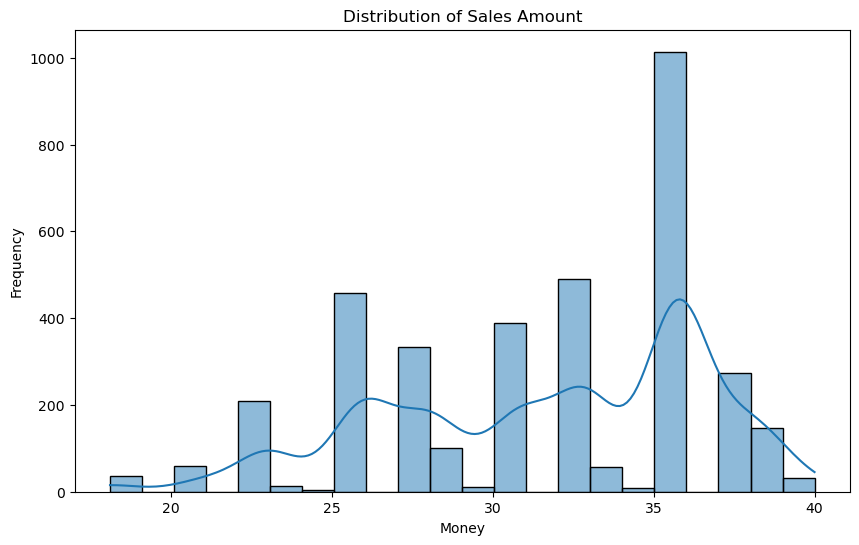

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['money'], kde = True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.show()

#### Revenue by Coffee Type

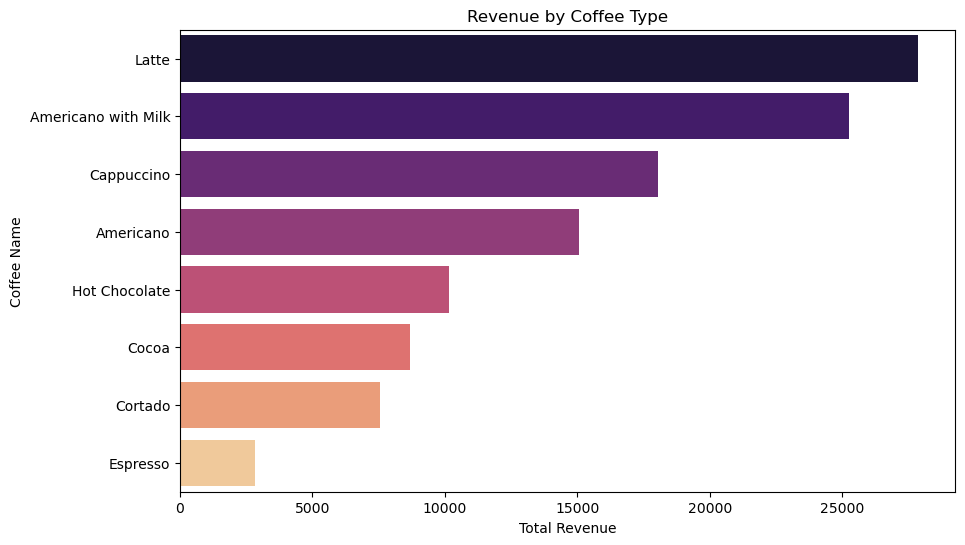

In [26]:
plt.figure(figsize=(10,6))
revenue = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
sns.barplot(x=revenue.values, y=revenue.index,palette='magma')
plt.title('Revenue by Coffee Type')
plt.xlabel('Total Revenue')
plt.ylabel('Coffee Name')
plt.show()

#### Sales by Hour

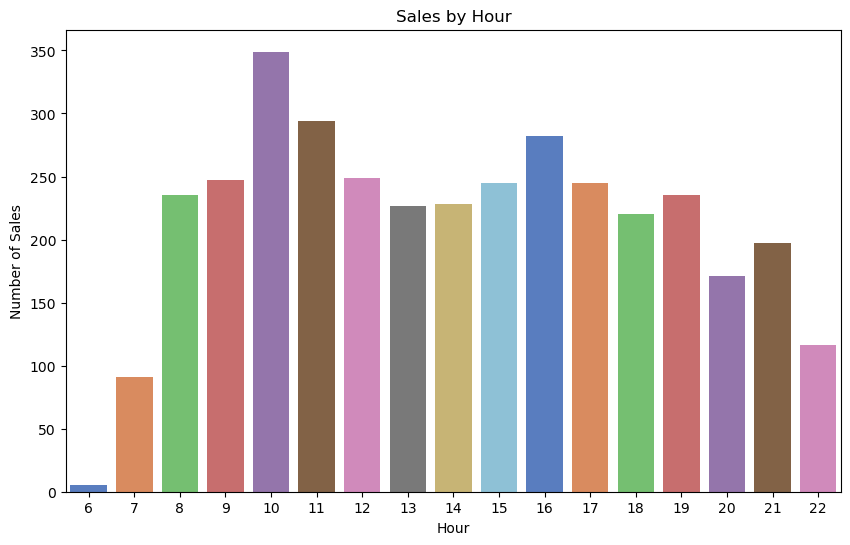

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='hour_of_day', palette='muted')
plt.title('Sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Sales')
plt.show()

#### Cash vs Card Sales Count

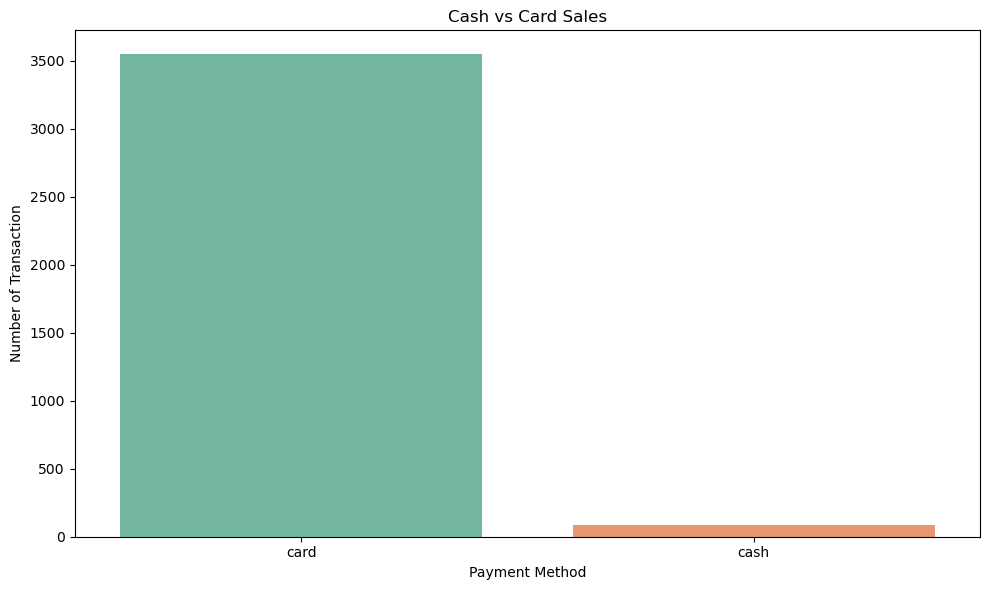

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='cash_type',palette='Set2')
plt.title('Cash vs Card Sales')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transaction')
plt.tight_layout()
plt.show()

#### Revenue Heatmap by Hour and Weekday

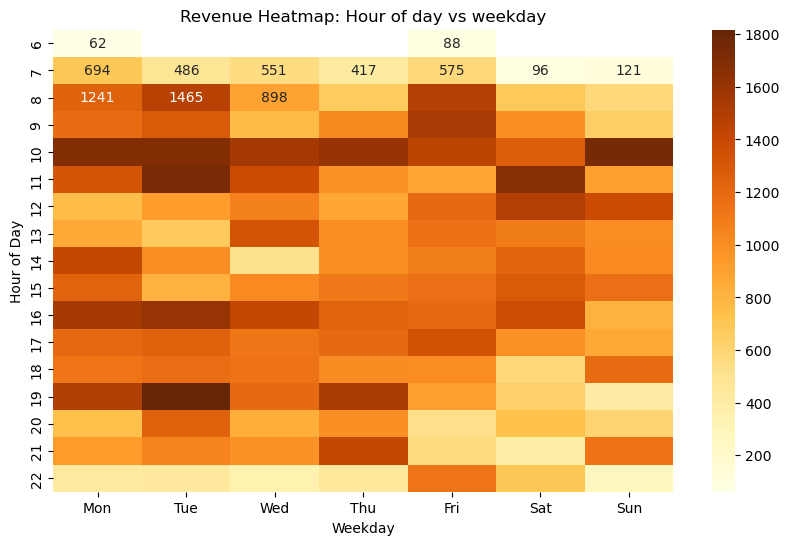

In [25]:
data = df.pivot_table(index = 'hour_of_day', columns = 'Weekday', values = 'money', aggfunc = 'sum')

data = data[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]

plt.figure(figsize=(10,6))
sns.heatmap(data,cmap ='YlOrBr' ,annot = True,fmt='.0f')
plt.title('Revenue Heatmap: Hour of day vs weekday')
plt.xlabel('Weekday')
plt.ylabel('Hour of Day')
plt.show()

#### Top 20 Returning Customers (by number of purchases)

count    1317.000000
mean        2.760820
std         7.213508
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       129.000000
Name: count, dtype: float64


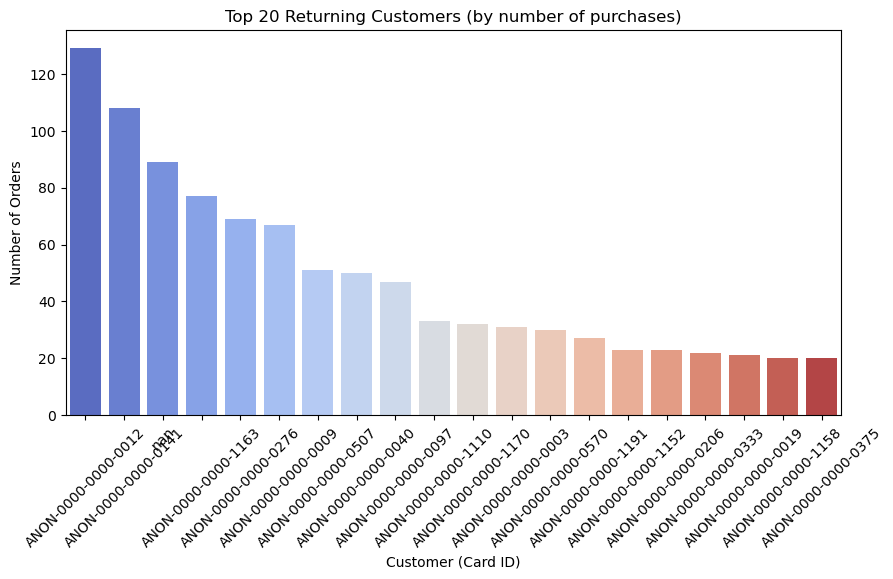

In [27]:
cust_orders  = df['card'].value_counts()
print(cust_orders.describe())

plt.figure(figsize=(10,5))
sns.barplot(x=cust_orders.head(20).index, y=cust_orders.head(20).values, palette='coolwarm')
plt.title('Top 20 Returning Customers (by number of purchases)')
plt.xlabel('Customer (Card ID)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

#### Most popular coffee per customers

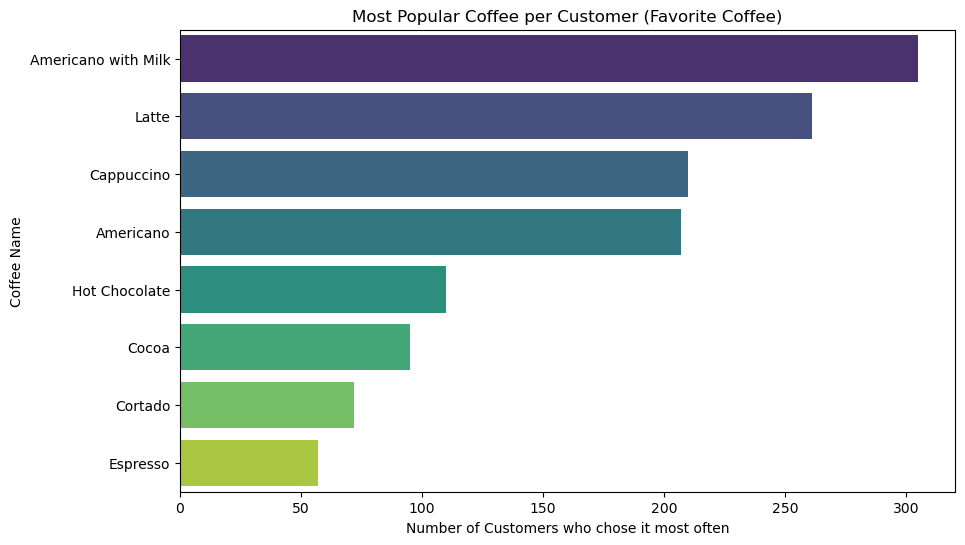

In [21]:
customer_coffee_counts = df.groupby(['card', 'coffee_name']).size().reset_index(name='order_count')

top_coffee_per_customer = customer_coffee_counts.loc[
    customer_coffee_counts.groupby('card')['order_count'].idxmax()]


favorite_counts = top_coffee_per_customer['coffee_name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=favorite_counts.values, y=favorite_counts.index, palette='viridis')
plt.title('Most Popular Coffee per Customer (Favorite Coffee)')
plt.xlabel('Number of Customers who chose it most often')
plt.ylabel('Coffee Name')
plt.show()

### Conclusion and Key Insights

### 1. **Sales Trends**
- **Peak hours:** Afternoon  
- **Busiest day:** Friday  
- **Highest month:** March (possible seasonal or promotional impact)  

### 2. **Product Performance**
- **Top sellers:** Americano With Milk,  Latte, and  Cappuccino
- **Average transaction value:** ~₹38.7  

### 3. **Customer Behavior**
- Most payments are via **card**.  
- Repeat buyers show **consistent product preferences** — indicating brand loyalty.  
diversify revenue.

---
